# Name : Janvi Patel

## The Spark Foundation: Task_1_Prediction using Supervised ML
we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [1]:
# Importing all required libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

### Load the Datset


In [3]:
url="http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data read successfully")
data.head(8)

Data read successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
len(data)

25

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Visulizing the dataset

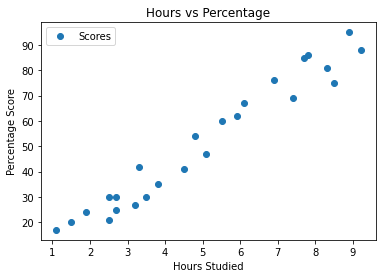

In [8]:
data.plot(x='Hours',y='Scores',style="o")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Splitting the dataset

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns='Scores'),
    data.Scores,
    test_size=0.20,
    random_state=0,
)
X_train.head(2)

,Hours
22,3.8
17,1.9


### Visualize Train and Test data 

Text(0.5, 1.0, 'Training Data')

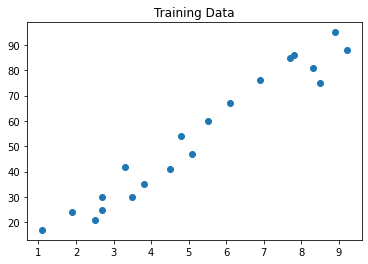

In [11]:
plt.scatter(X_train,y_train)
plt.title('Training Data')

Text(0.5, 1.0, 'Test Data')

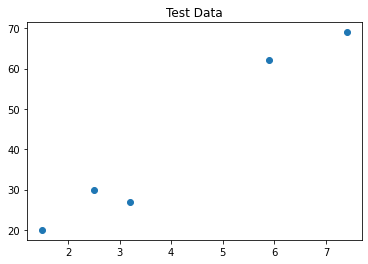

In [12]:
plt.scatter(X_test,y_test)
plt.title('Test Data')

### Training the Linear Regression Model

In [13]:
linreg=LinearRegression().fit(X_train,y_train)

### Visualizing the model

In [14]:
line=linreg.coef_*data.Hours+linreg.intercept_

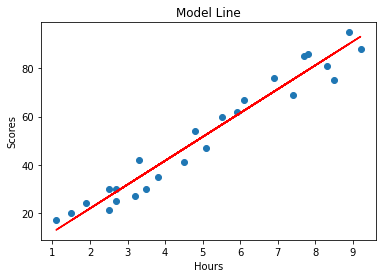

In [15]:
plt.scatter(data.Hours,data.Scores)
plt.plot(data.Hours, line,color='Red')
plt.title('Model Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Predicting test values to calculate Error

In [16]:
pred=linreg.predict(X_test)

### Visualizing perdicted and Actual values.

In [17]:
df = pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
plt.scatter(X_test,y_test,color='red',label='Test_Data')
plt.scatter(X_test,pred,color='blue',label='Predicated_data')
plt.legend()
plt.title('Predicted VS Actual')

### Own Predication

Hours =9.25                                                                                                                                      
Score has to be predicted for this using our Linear Regression model

In [18]:
hours=np.array(9.25).reshape(-1,1)
own_pred=linreg.predict(hours)
print('No of Hours:'+str(hours[0][0]))
print('Pridicted Score:'+str(own_pred[0]))

No of Hours:9.25
Pridicted Score:93.69173248737538


## Here we get predicted  score of a student for studing 9.25 hours per day is 93.69%

### Evaluting the model

In [19]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,pred))

Mean Absolute Error: 4.183859899002975
